#                       **Medical Appointment No Shows Project (EDA)**






---

## Part 1

###**Overview**




In this project, I am using a dataset called **Medical Appointment No Shows** 
which was collected from Kaggle website through this link:
https://www.kaggle.com/joniarroba/noshowappointments

The dataset is basically about the reason that prevents a patient from attending an appointment. the target value in this dataset is initially ("No-show") I will try to answer all questions that come to my mind such as:


*   What are feature/s that affect most on attending the appointment?
*   Does the difference time between the Scheduled Day feature and Appointment Day feature matter?
*   Does Gender contribute to the game?



###**Data Features details**


 1. **PatientId**: Identification of a patient

 2. **AppointmentID**: Identification of each appointment

 3. **Gender**: Male or Female. Female is the greater proportion, women take way more care of their health in comparison to men.

 4. **ScheduledDay**: The day someone called or registered the appointment, this is before the appointment of course.
The day of the actual appointment, when they have to visit the doctor.


 5. **AppointmentDay**: 
The day of the actual appointment, when they have to visit the doctor.



 6. **Age**: How old is the patient.

 7. **Neighbourhood**: Where the appointment takes place.

 8. **Scholarship**: True or False. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia (Brazilian educational and medical scholarship)

9. **Hypertension**: True or False. Has high pressure?

10. **Diabetes**: True or False.

11. **Alcoholism**: True or False.

11. **Handicap**: True or False.

12. **SMS_received**: 1 or more messages sent to the patient.

13. **No-show**: True or False. The target value which if we decide to model

***Quick note:***

The dataset timeline starts from the 10th of November 2015 to the 23rd of June 2016.


---



##Part 2 



###**Loading and Exploring the dataset**

In [4]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
sns.set_style("whitegrid")

In [53]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [54]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [55]:
df.shape

(110527, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [57]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- Convert (ScheduledDay, AppointmentDay) to a date only.

In [58]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date.astype('datetime64')
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date.astype('datetime64')

- Converting Gender values to Male and Female for better visulaization

In [59]:
df['Gender'] = df.Gender.map({'M':'Male', 'F':'Female'})



- Rename mis-spelled column names and use (Male, Female) instead of (M,F).

In [60]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'visit'})

- New column to calculate the time difference between registration of the appointement and the visit of the appointement

In [61]:
time_until_visit = df.AppointmentDay - df.ScheduledDay
time_until_visit = time_until_visit.dt.days
df.insert(5,"time_until_visit" , time_until_visit)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,time_until_visit,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,2.987250e+13,5642903,Female,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,Male,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,Female,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,Female,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,Female,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I will ignore the first 2 columns as they are just random values that could affect our analysis, also the neighbourhood column contains 88% of random neighbourhoods, finaly I extracted the time until a patient should visit for the appoentment, so will drop both **ScheduledDay** and **AppointmentDay** I think all of them will just add some more complexity. 

In [62]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'AppointmentDay', 'ScheduledDay'], axis='columns', inplace=True)
df.head(10)

,Gender,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,Female,0,62,0,1,0,0,0,0,No
1,Male,0,56,0,0,0,0,0,0,No
2,Female,0,62,0,0,0,0,0,0,No
3,Female,0,8,0,0,0,0,0,0,No
4,Female,0,56,0,1,1,0,0,0,No
5,Female,2,76,0,1,0,0,0,0,No
6,Female,2,23,0,0,0,0,0,0,Yes
7,Female,2,39,0,0,0,0,0,0,Yes
8,Female,0,21,0,0,0,0,0,0,No
9,Female,2,19,0,0,0,0,0,0,No


In [63]:
df.Gender.value_counts()

Female    71840
Male      38687
Name: Gender, dtype: int64

We can see that 65% of Gender are women and 35% are men.

In [64]:
df.visit.value_counts()

No     88208
Yes    22319
Name: visit, dtype: int64

Almost 80% didn't come to the appointement and 20% did come.. which indicates that we're dealing with imbalance target. 

In [65]:
df[['visit', 'SMSReceived']].groupby(['visit'], as_index=False).sum().sort_values(by='visit', ascending=False)

,visit,SMSReceived
1,Yes,9784
0,No,25698


In [66]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [67]:
df[['visit', 'Scholarship']].groupby(['visit'], as_index=False).sum().sort_values(by='visit', ascending=False)

,visit,Scholarship
1,Yes,2578
0,No,8283


- **Handicap:**

In the dataset metadata it is said that the handicap feature should contain a boolean value. However, this feature assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, we will map to 1 any value higher than 0.



In [68]:
df.Handicap = np.where(df['Handicap']>0, 1, 0)
df.max()

Gender              Male
time_until_visit     179
Age                  115
Scholarship            1
Hypertension           1
Diabetes               1
Alcoholism             1
Handicap               1
SMSReceived            1
visit                Yes
dtype: object

In [69]:
df.Handicap.unique()

array([0, 1])

- **Time until visit:**

from describe function we saw that the feature time_until_visit has a minmum value of (-6) for the difference between time of ScheduledDay and AppointmentDay... by logic it is a typo... lets first count any value less than zero and I will drop them too!

In [70]:
df.time_until_visit[df.time_until_visit<0].count()

5

In [71]:
df = df[df.time_until_visit >= 0]
df.head()

,Gender,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,Female,0,62,0,1,0,0,0,0,No
1,Male,0,56,0,0,0,0,0,0,No
2,Female,0,62,0,0,0,0,0,0,No
3,Female,0,8,0,0,0,0,0,0,No
4,Female,0,56,0,1,1,0,0,0,No


In [72]:
df.describe(include=['O'])

,Gender,visit
count,110522,110522
unique,2,2
top,Female,No
freq,71837,88208


- **Age**: 

let's explore **Age** feature
The age column has -1 which doesn't make sense... for 0 age I would think of babies that have few months more or less but do not reach one year yet.. I think it is a typo.. lets drop it.

In [73]:
df.Age[df.Age<=0].count()

3540

In [74]:
df.Age[df.Age<0].count()

1

In [75]:
df.Age[df.Age > 110].count()

5

In [76]:
df.Age.max()

115

Age has an outlier value which is 115, since it is one value I will drop it for this project EDA ont modelling.

Text(0.5, 1.0, 'Age box plot')

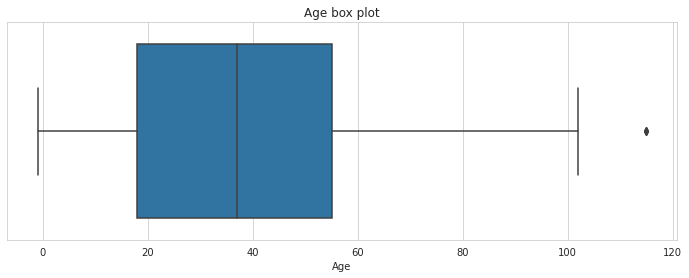

In [77]:
plt.figure(figsize=(12,4));
Age_plot = sns.boxplot(x = df.Age)
Age_plot.set_title("Age box plot")


In [78]:
df = df[df.Age >= 0]
df = df[df.Age < 115]
df.head()

,Gender,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,Female,0,62,0,1,0,0,0,0,No
1,Male,0,56,0,0,0,0,0,0,No
2,Female,0,62,0,0,0,0,0,0,No
3,Female,0,8,0,0,0,0,0,0,No
4,Female,0,56,0,1,1,0,0,0,No


**It doesn't make sense that babies have Hypertension or Diabetes or Alcoholism.. lets see**

In [79]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit


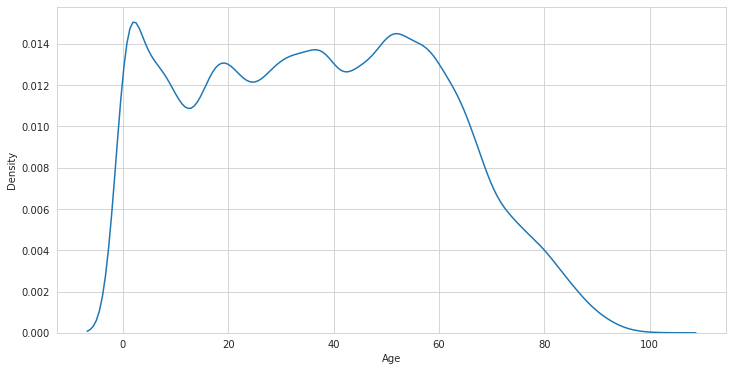

In [80]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['Age']);

In [81]:
df.describe()

,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000
mean,10.184272,37.085861,0.098275,0.197257,0.071872,0.030403,0.020223,0.321049
std,15.255201,23.104465,0.297688,0.397929,0.258277,0.171694,0.140764,0.466882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now time to make some plot to investigate more...

##**Part 3**

###**Data Visulaization**

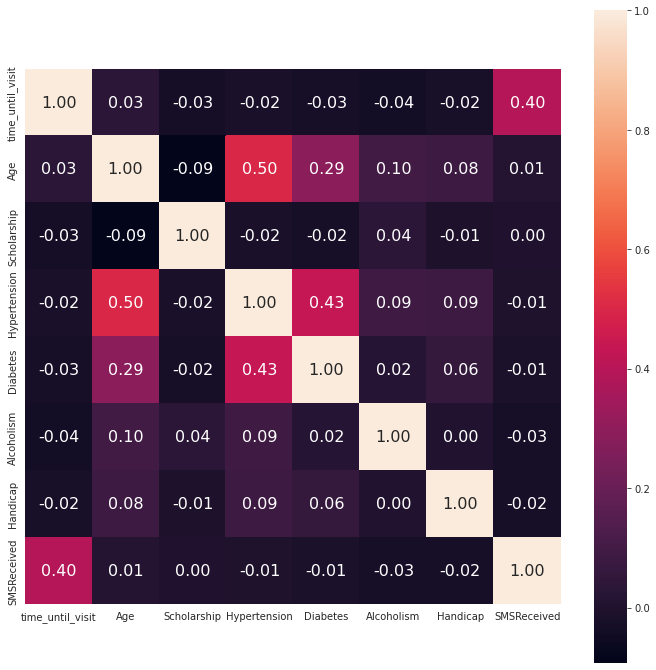

In [82]:
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(correlation, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 16});

From this plot I can see that some strong relationships between features like time until visit and smsreceived or between some other features like Hypertension and Age but for our EDA we need just to figure out these inctences when modlling as it will be not a good features (together) for the target value(visit).



---



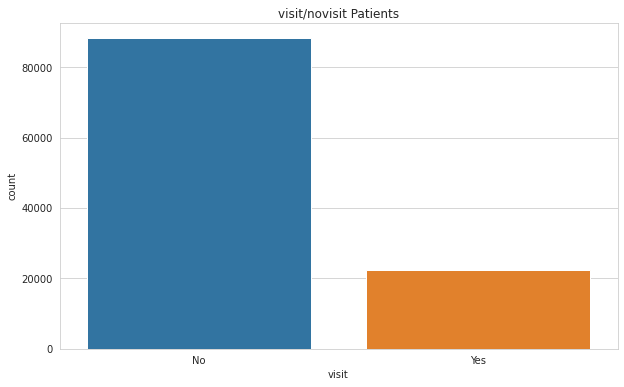

In [83]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.visit, data=df)
ax.set_title("visit/novisit Patients")
plt.show()

- It is clear that we're dealing with imbalance dataset/target.

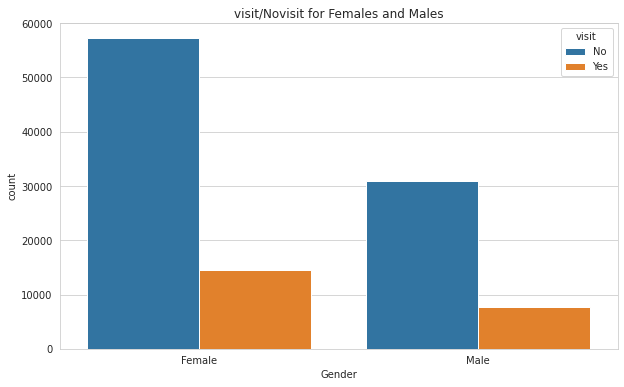

In [84]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Gender, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above graph we can clearly see that 'Female' patients usually have more appointments than 'Male' patients. But if we closely look at the visit distribution across Male and Female it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not.

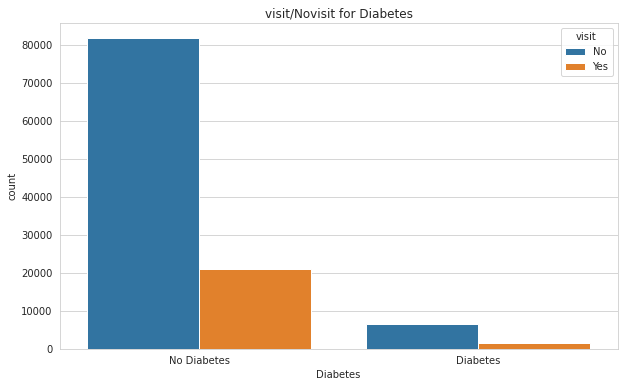

In [86]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Diabetes, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

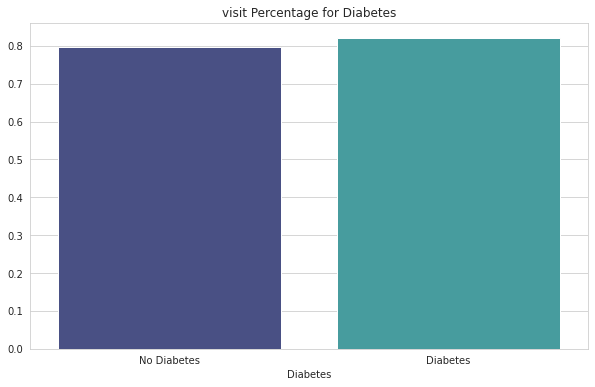

In [87]:
plt.figure(figsize=(10,6))
Diabetes_ratio = df[df.visit == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=Diabetes_ratio.index, y=Diabetes_ratio, palette="mako")
ax.set_title("visit Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 80% without Diabetes, have come for the visit.
on the other hand pepole with Diabetes around 83% of them have come for the visit.
So, Diabetes feature could be a good feature to use.

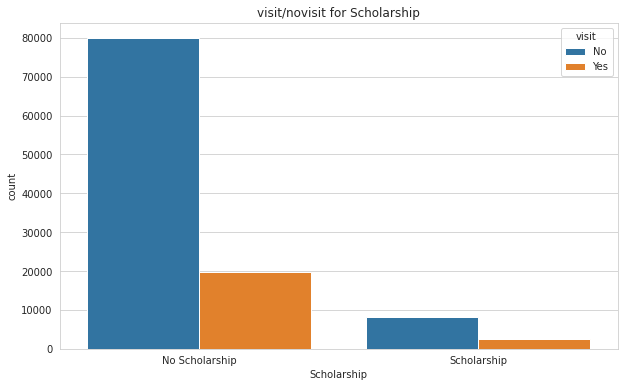

In [88]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Scholarship, hue=df.visit, data=df)
ax.set_title("visit/novisit for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

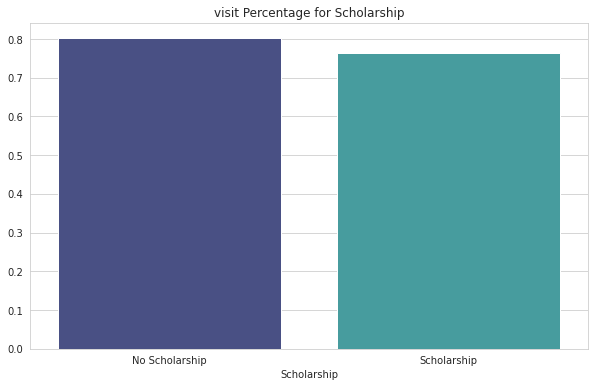

In [89]:
plt.figure(figsize=(10,6))
scholarshipratio = df[df.visit == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=scholarshipratio.index, y=scholarshipratio, palette="mako")
ax.set_title("visit Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

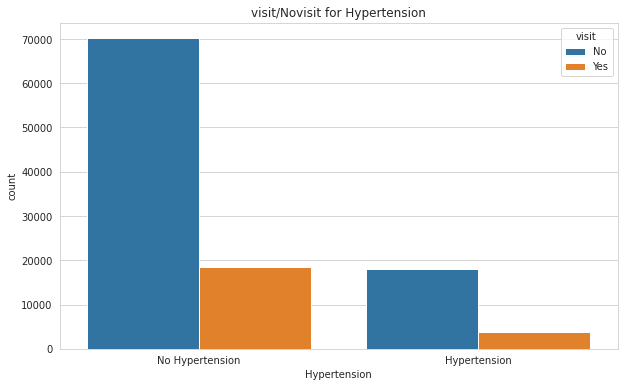

In [90]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Hypertension, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Hypertension shows that number of no hypertension that didn't come is larger but feels the same proprtion.

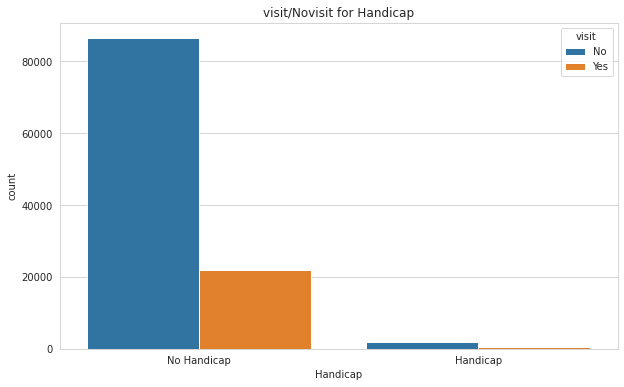

In [91]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Handicap, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Handicap")
x_ticks_labels=['No Handicap', 'Handicap']
ax.set_xticklabels(x_ticks_labels)
plt.show()

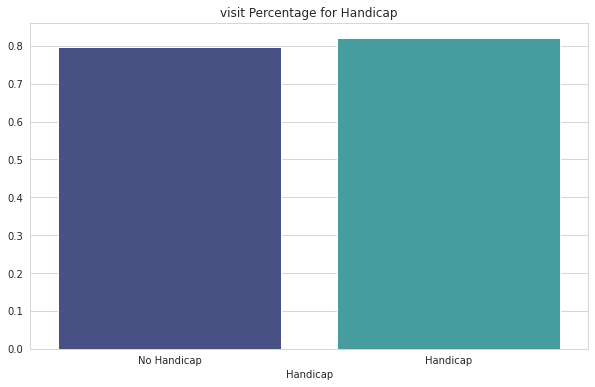

In [92]:
plt.figure(figsize=(10,6))
smsratio = df[df.visit == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=smsratio.index, y=smsratio, palette="mako")
ax.set_title("visit Percentage for Handicap")
x_ticks_labels=['No Handicap', 'Handicap']
ax.set_xticklabels(x_ticks_labels)
plt.show()

**Handicap features after editing it with has Handicap or not as boolean shows that with pepole with Handicap have higher probability to visit.. good feature too I reckon.**

In [46]:
df.Handicap.value_counts()

0    42323
1      867
Name: Handicap, dtype: int64

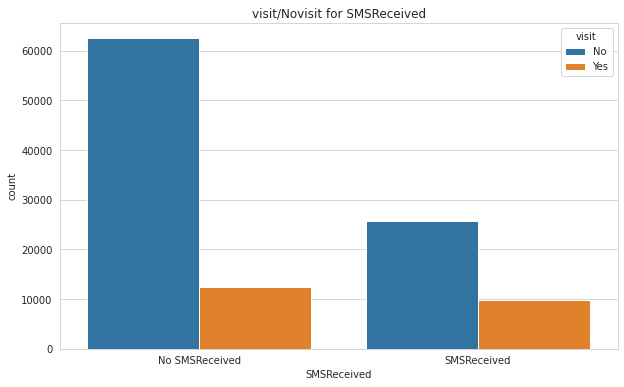

In [93]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.SMSReceived, hue=df.visit, data=df)
ax.set_title("visit/Novisit for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

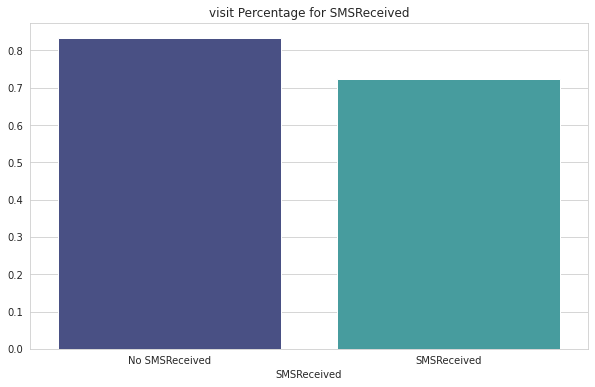

In [94]:
plt.figure(figsize=(10,6))
smsratio = df[df.visit == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=smsratio.index, y=smsratio, palette="mako")
ax.set_title("visit Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

**As can be seen the SMSReceived has a good indication that people who don't receive the SMS are more likely to not come by a large portion almost 90%. on the other hand when receiving the SMS have almost 72% and I think the time difference plays a role here as to when receiving the sms and how close the appointment to the day it was booked. It is one of the good features..**

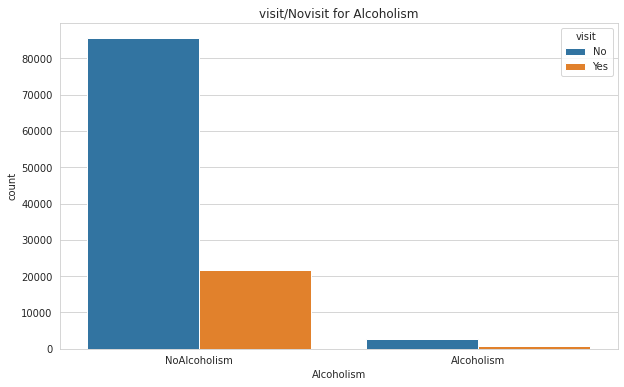

In [95]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df.Alcoholism, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Alcoholism")
x_ticks_labels=['NoAlcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

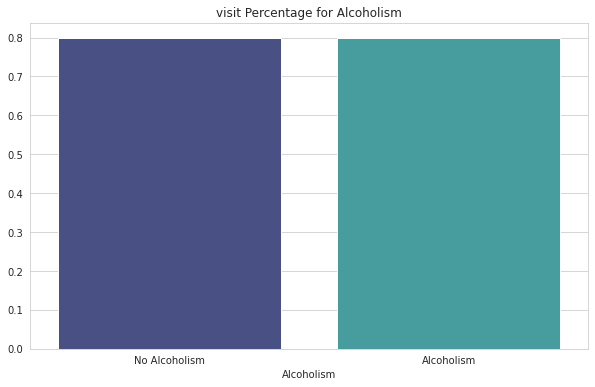

In [96]:
plt.figure(figsize=(10,6))
df_a_ratio = df[df.visit == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio, palette="mako")
ax.set_title("visit Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above graph we can see that there are 80%  without Alcoholism have come for the visit. with Alcoholism around 80% of them have come for the visit. There are no differences so it will not help as a feature.

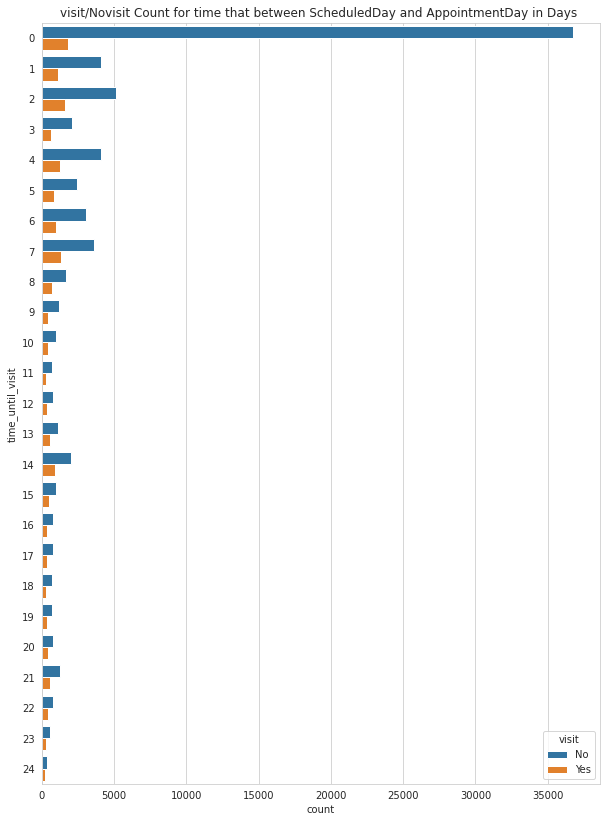

In [97]:
plt.figure(figsize=(10,14))
time_until_visit_sorted = np.sort(df.time_until_visit.unique())
ax = sns.countplot(y=df.time_until_visit, hue=df.visit, order = time_until_visit_sorted[0:25])
ax.set_title("visit/Novisit Count for time that between ScheduledDay and AppointmentDay in Days ")
plt.show()

It is clear that patients who had their appointement in the same day for some reasons didn't come... I think they had to wait for longer time in hours.. the longer the time to visit, less numbers of patients would be keen on thier appointments..

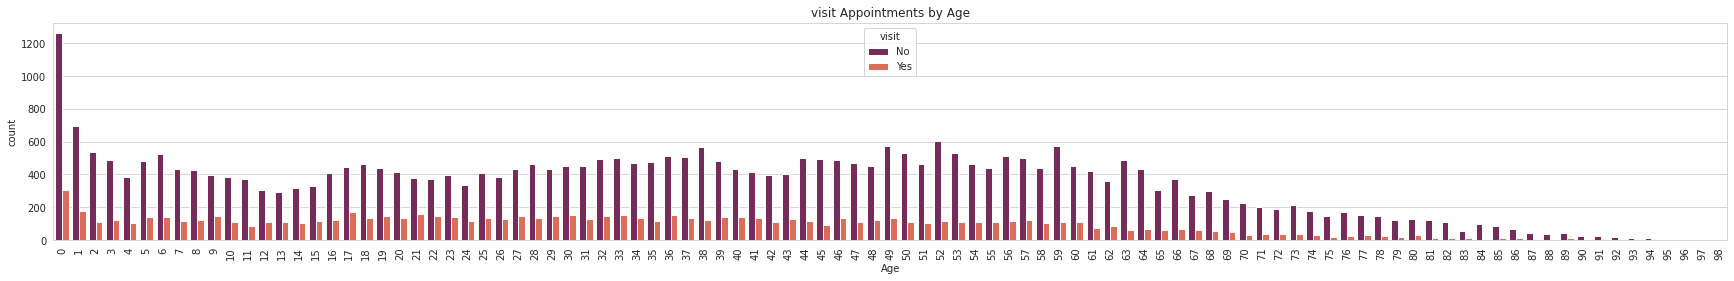

In [52]:
plt.figure(figsize=(30,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.visit, palette="rocket")
ax.set_title("visit Appointments by Age")
plt.show()



---



- ### **conclusion**   
######  Some Features have a good relation when modelling from the visual graphs such as Handicap, SMSReceived, and Age that could help us when using aolgrithms but needed further analysis with some feature engineering.

##### So, As for my questions I can now with a confidence answer them with the aid of visulaization part as follows:    
1. What is/are most effective features I come up with?

- Handicap, Smsreceived, time until visit, Scholarship,Hypertension and Diabetes are the most effective.

2.  Does the difference time between the Scheduled Day feature and Appointment Day feature matter?

- Yes I think the closer the time (same day) the visit become harder and the longer wait time in the same day is an issue. on the other hand the longer the time in days/ monthes without SMS could also contrbuite.

3.  Does Gender contribute to the game?

- Gender shows no difference as to visit or not.

I therefor would recommend that healthcare sector manage their appointment system be scdualed better in terms of the waiting time in the same day or even longer times with the aid of sms texting to help remind the patints before the due time i.e. a week before the due date to alert them. Also, to highly consider giving people with chronic diseases a special cases for the appointments.

